In [1]:
# Read observation ids from file (thanks @fredy for the data!)
import csv


INFILE_OBSERVATION_IDs = './SSTV_2018June/observation_ids.txt'

observation_ids = []

with open(INFILE_OBSERVATION_IDs, 'r') as infile:
    for line in infile:
        if len(line[:-2]) < 2:
            continue
        if line[0] == '#':
            if 'dev' in line[2:]:
                # Ignore observations from dev instance for now
                break
            continue
                
        observation_ids.append(int(line[:-1]))

In [2]:
import requests

NETWORK_BASE_URL = 'https://network.satnogs.org/api'

In [3]:
# Get observation data via the API of satnogs-network
# NOTE: This operation creates a request for each single observation,
# try to avoid unnecessary requests to the API, e.g. by caching the result

observations = []
for observation_id in observation_ids:
    r = requests.get(url='{}/observations/{}/'.format(NETWORK_BASE_URL, observation_id))
    if r.status_code != requests.codes.ok:
        print("Observation {} not found in network.".format(observation_id))
        continue
    data = r.json()
    observations.append(r.json())

In [10]:
import json
SSTV_observations_dump = 'SSTV_2018June/observations.json'
SSTV_ground_stations_dump = 'SSTV_2018June/ground_stations.json'

In [64]:
# Store fetched observation data in a local file

with open(SSTV_observations_dump, 'w') as outfile:
    json.dump(observations, outfile)

In [12]:
# Load observation data from file

with open(SSTV_observations_dump, 'r') as f:
    observations = json.load(f)

with open(SSTV_ground_stations_dump, 'r') as f:
    ground_stations = json.load(f)

In [5]:
# Show data of the first observation in the list

from IPython.display import Image, HTML, display
import ipywidgets as widgets

observation = observations[0]

imagesList=''.join( ["<img style='width: 200px; margin: 10px; float: left; border: 1px solid black;' src='%s' />" % demoddata['payload_demod'] 
                 for demoddata in observation['demoddata'] ])

print("Ground Station {}".format(observation['ground_station']))
display(HTML(imagesList))

Ground Station 13


In [6]:
# Load observation metadata inta a pandas DataFrame for better analysis
from pandas import DataFrame, unique

# observations_sorted = sorted(observations, key=lambda obs: obs['ground_station'])
# observations_by_ground_stations = groupby(observations_sorted, key=lambda obs: obs['ground_station'])
observations_df = DataFrame.from_records(data=observations, index='id')
observations_df['start'] = pd.to_datetime(observations_df['start'])
observations_df['end'] = pd.to_datetime(observations_df['end'])

observations_df

,client_metadata,client_version,demoddata,end,ground_station,norad_cat_id,payload,start,station_lat,station_lng,station_name,transmitter,vetted_status,waterfall
id,,,,,,,,,,,,,,
170192,"{""latitude"": 55.51, ""elevation"": 48.0, ""radio""...",1.0-pre,[{'payload_demod': 'https://network.satnogs.or...,2018-06-29T10:34:54Z,13,25544,https://network.satnogs.org/media/data_obs/170...,2018-06-29T10:25:07Z,55.510000,11.740000,OZ9AEC-VHF1,qW5N27QuSrN2JMasbNiUhR,good,https://network.satnogs.org/media/data_obs/170...
170212,,,[{'payload_demod': 'https://network.satnogs.or...,2018-06-29T10:21:38Z,12,25544,https://network.satnogs.org/media/data_obs/170...,2018-06-29T10:10:38Z,42.744000,-71.538000,W2BFJ,qW5N27QuSrN2JMasbNiUhR,good,https://network.satnogs.org/media/data_obs/170...
170280,"{""latitude"": 50.77, ""elevation"": 60.0, ""radio""...",0.6.2,[{'payload_demod': 'https://network.satnogs.or...,2018-06-29T10:34:05Z,91,25544,https://network.satnogs.org/media/data_obs/170...,2018-06-29T10:23:04Z,50.770000,-2.020000,VHF QFH Minikits LNA RTL-SDR,qW5N27QuSrN2JMasbNiUhR,good,https://network.satnogs.org/media/data_obs/170...
170304,"{""latitude"": 41.84, ""elevation"": 189.0, ""radio...",0.6.2,[{'payload_demod': 'https://network.satnogs.or...,2018-06-29T10:18:33Z,41,25544,https://network.satnogs.org/media/data_obs/170...,2018-06-29T10:08:43Z,41.840000,-87.640000,Chicago1,qW5N27QuSrN2JMasbNiUhR,good,https://network.satnogs.org/media/data_obs/170...
170362,"{""latitude"": 48.64358, ""elevation"": 3.0, ""radi...",1.0-pre,[{'payload_demod': 'https://network.satnogs.or...,2018-06-29T10:34:59Z,101,25544,https://network.satnogs.org/media/data_obs/170...,2018-06-29T10:23:56Z,48.643580,2.231068,Marcs,qW5N27QuSrN2JMasbNiUhR,good,https://network.satnogs.org/media/data_obs/170...
170363,"{""latitude"": 48.64358, ""elevation"": 3.0, ""radi...",1.0-pre,[{'payload_demod': 'https://network.satnogs.or...,2018-06-29T12:10:29Z,101,25544,https://network.satnogs.org/media/data_obs/170...,2018-06-29T12:00:37Z,48.643580,2.231068,Marcs,qW5N27QuSrN2JMasbNiUhR,good,https://network.satnogs.org/media/data_obs/170...
170430,,,[{'payload_demod': 'https://network.satnogs.or...,2018-06-29T14:34:46Z,65,25544,https://network.satnogs.org/media/data_obs/170...,2018-06-29T14:23:44Z,-27.863500,153.315200,QG62,qW5N27QuSrN2JMasbNiUhR,good,https://network.satnogs.org/media/data_obs/170...
170472,"{""latitude"": -26.709, ""elevation"": 1490.0, ""ra...",0.6.2,[{'payload_demod': 'https://network.satnogs.or...,2018-06-29T14:06:41Z,62,25544,https://network.satnogs.org/media/data_obs/170...,2018-06-29T13:55:49Z,-26.709000,27.834000,ZR6TG Sat Ground Station (VHF),qW5N27QuSrN2JMasbNiUhR,good,https://network.satnogs.org/media/data_obs/170...
170473,"{""latitude"": -26.709, ""elevation"": 1490.0, ""ra...",0.6.2,[{'payload_demod': 'https://network.satnogs.or...,2018-06-29T15:42:32Z,62,25544,https://network.satnogs.org/media/data_obs/170...,2018-06-29T15:33:18Z,-26.709000,27.834000,ZR6TG Sat Ground Station (VHF),qW5N27QuSrN2JMasbNiUhR,good,https://network.satnogs.org/media/data_obs/170...


In [7]:
# Calculate the number of observations per ground station

ground_station_stats = DataFrame({'count': observations_df.groupby('ground_station').size()}).reset_index().set_index('ground_station')
ground_station_ids = list(ground_station_stats.index)
ground_station_stats

,count
ground_station,
2,17
4,10
6,7
7,6
12,12
13,6
15,6
27,10
33,5


In [102]:
# Show all images for all ground stations
# (based on: https://stackoverflow.com/a/27795087)

IMG_HTML_TEMPLATE = "<img style='width: 200px; margin: 10px; float: left; border: 1px solid black;' src='%s' />"

for ground_station_id, obs in observations_df.groupby('ground_station'):
    no_images = sum(map(lambda observation_id: len(observations_df.loc[observation_id]['demoddata']), obs.index))
    print('{}: {} observations, {} images'.format(ground_station_id, len(obs), no_images))

    for observation_id in obs.index:
        imagesList = ''.join( [IMG_HTML_TEMPLATE % demoddata['payload_demod'] 
                               for demoddata in observations_df.loc[observation_id]['demoddata'] ])

        display(HTML(imagesList))

2: 17 observations, 37 images


4: 10 observations, 20 images


6: 7 observations, 13 images


7: 6 observations, 17 images


12: 12 observations, 23 images


13: 6 observations, 16 images


15: 6 observations, 15 images


27: 10 observations, 22 images


33: 5 observations, 9 images


35: 6 observations, 11 images


36: 11 observations, 18 images


37: 14 observations, 27 images


38: 12 observations, 26 images


41: 9 observations, 19 images


43: 10 observations, 12 images


47: 13 observations, 27 images


49: 9 observations, 19 images


54: 10 observations, 18 images


56: 14 observations, 24 images


57: 10 observations, 19 images


58: 9 observations, 19 images


59: 4 observations, 4 images


62: 10 observations, 22 images


65: 5 observations, 13 images


83: 3 observations, 3 images


86: 3 observations, 5 images


87: 10 observations, 16 images


91: 1 observations, 2 images


96: 9 observations, 18 images


101: 12 observations, 39 images


102: 10 observations, 19 images


105: 9 observations, 14 images


110: 9 observations, 21 images


115: 4 observations, 4 images


121: 6 observations, 6 images


126: 9 observations, 9 images


130: 2 observations, 2 images


140: 9 observations, 9 images


141: 9 observations, 12 images


142: 2 observations, 4 images


146: 2 observations, 4 images


In [8]:
from urllib.parse import urlparse
from datetime import datetime

data_events = []
for id, observation in observations_df.iterrows():
    payload_demod = urlparse(observation.demoddata[0]['payload_demod'])
    t_str=payload_demod.path.split('/')[-1].split('_')[-1].split('.')[0]
    try:
        date = datetime.strptime(t_str, '%Y-%m-%dT%H-%M-%S')
        data_events.append({'date': date,
                            'observation_id': id,
                            'ground_station': observation.ground_station,
                            'payload_demod': observation.demoddata[0]['payload_demod']})
    except:
        print("Couldn't parse '{}'.".format(payload_demod.path.split('/')[-1]))

Couldn't parse 'data_170930_2018-06-30T04-44-24_.png'.
Couldn't parse 'data_170931_2018-06-30T06-20-58_.png'.
Couldn't parse 'data_170969_2018-06-30T06-18-25-A.jpg'.
Couldn't parse 'data_170979_2018-06-30T04-42-44-B.jpg'.
Couldn't parse 'data_171686_2018-07-01T08-42-14_.png'.
Couldn't parse 'data_171730_2018-07-01T05-28-45_.png'.


<IPython.core.display.Javascript object>


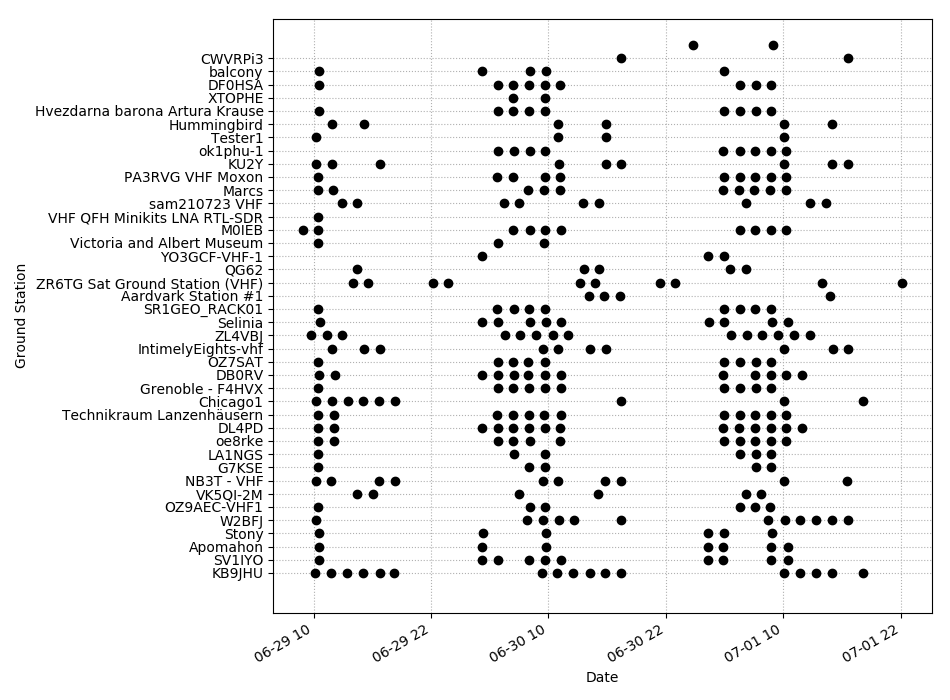

In [55]:
# Plot all demodulated payloads grouped by the ground_station
# based on: https://stackoverflow.com/a/25042264

%matplotlib notebook
plt.rcParams["figure.figsize"] = [9.5, 7]

import matplotlib.pyplot as plt

# Create pandas.DataFrame for easier handling
df = DataFrame.from_records(data_events, index='date')

# Map ground_stations to y-values
cat_dict = dict(zip(ground_station_ids, range(1, len(ground_station_ids)+1)))

# map y-values to categories
val_dict = dict(zip(range(1, len(ground_station_ids)+1), list(map(lambda gs: gs['name'], ground_stations))))

# Add y-values to the data
df['plot_y'] = df['ground_station'].apply(cat_dict.get)

fig, ax = plt.subplots()
df['plot_y'].plot(ax=ax, style='ko')

# format y-ticks look up the categories

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: val_dict.get(x)))
ax.set_yticks(range(1, len(ground_station_ids)))
ax.set_ylim([-2,len(ground_station_ids)+2])

ax.set_xlabel('Date')
ax.set_ylabel('Ground Station')

ax.grid(linestyle='dotted')

plt.tight_layout()
plt.show()

In [9]:
# Fetch ground station metadata from network

ground_stations = []
for ground_station_id in ground_station_ids:
    r = requests.get(url='{}/stations/{}/'.format(NETWORK_BASE_URL, ground_station_id))
    if r.status_code != requests.codes.ok:
        print("Ground Station {} not found in network.".format(ground_station_id))
        continue
    data = r.json()
    ground_stations.append(r.json())

In [11]:
# Store fetched observation data in a local file

with open(SSTV_ground_stations_dump, 'w') as outfile:
    json.dump(ground_stations, outfile)

In [56]:
ground_stations[0]

{'id': 2,
 'name': 'KB9JHU',
 'altitude': 280,
 'min_horizon': 10,
 'lat': 39.236,
 'lng': -86.305,
 'qthlocator': 'EM69uf',
 'location': '',
 'antenna': ['UHF Yagi', 'VHF Yagi'],
 'created': '2015-07-22T14:24:10Z',
 'last_seen': '2018-07-03T01:39:02Z',
 'status': 'Online',
 'observations': 11910,
 'description': 'Yaesu G-5500 with M2 cross yagi antennas'}

In [57]:
# Create ground station GeoJSON feature collection
import geojson

gs_features = []
for ground_station in ground_stations:
    ob_feature = geojson.Feature(geometry=geojson.Point((ground_station['lng'],
                                                         ground_station['lat'])),
                                 properties=ground_station)
    gs_features.append(ob_feature)
# gs_collection = geojson.FeatureCollection(features)

In [83]:
# Find the first start time and the last end time
from datetime import datetime, date


start_time_str = sorted(observations, key=lambda obs: obs['start'])[0]['start']
end_time_str = sorted(observations, key=lambda obs: obs['end'])[-1]['end']

start_time = datetime.strptime(start_time_str, '%Y-%m-%dT%H:%M:%SZ')
end_time = datetime.strptime(end_time_str, '%Y-%m-%dT%H:%M:%SZ')

In [62]:
# Get satellite meta data

norad_cat_id = observations[0]['norad_cat_id']
DB_BASE_URL = 'https://db.satnogs.org/api'

r = requests.get(url='{}/satellites/{}/'.format(DB_BASE_URL, norad_cat_id))
if r.status_code != requests.codes.ok:
    print("ERROR: Satellite {} not found in network.".format(norad_cat_id))
satellite_meta = r.json()
satellite_meta['start'] = start_time_str
satellite_meta['end'] = end_time_str

In [117]:
# Calculate non-overlapping, continuous observation windows
data = []
for i, row in observations_df.iterrows():
    data.append((row.start, row.end))
data

# Source: https://stackoverflow.com/a/34797890

def merge_date_ranges(data):
    result = []
    t_old = data[0]
    for t in data[1:]:
        if t_old[1] >= t[0]:  #I assume that the data is sorted already
            t_old = ((min(t_old[0], t[0]), max(t_old[1], t[1])))
        else:
            result.append(t_old)
            t_old = t
    else:
        result.append(t_old)
    return result

observation_timespans = merge_date_ranges(data)
print(len(data), len(observation_timespans))

334 66


In [182]:
# Calculate satellite ground track using pyephem
# (Fetching the TLE wasn't possible, use hardcoded TLE instead)
import ephem
from datetime import datetime
import pandas as pd

# Return 'num' evenly spaced datetimes in the range from 'start' to 'stop'
def lin_datetime_range(start, end, num=50):
    time_step = (end - start)/num
    for n in range(num):
        yield start + n * time_step

line1 = "ISS (ZARYA)"

# Source: https://network.satnogs.org/observations/173068/
line2 = '1 25544U 98067A   18178.89922601  .00002605  00000-0  46821-4 0  9990'
line3 = '2 25544  51.6409 325.3099 0003937 234.5373 265.1059 15.53980986120181'

satellite = ephem.readtle(line1, line2, line3)
sat_features = []
for observation_window in observation_timespans:
    sat_positions = []
    for t in pd.date_range(start=observation_window[0], end=observation_window[1], freq='20s'):
        satellite.compute(t)
        if(len(sat_positions)>1 and satellite.sublong/ephem.degree<sat_positions[-1][0]):
            # Cut LineString when crossing the antimeridian to prevent antimeridian artifacts
            sat_linestring = geojson.LineString(sat_positions)
            sat_features.append(geojson.Feature(geometry=sat_linestring, properties=satellite_meta))
            sat_positions = []
        sat_positions.append((satellite.sublong/ephem.degree,
                             satellite.sublat/ephem.degree))
    sat_linestring = geojson.LineString(sat_positions)
    sat_features.append(geojson.Feature(geometry=sat_linestring, properties=satellite_meta))

In [183]:
# Combine ground station and satellite features
collection = geojson.FeatureCollection([*gs_features, *sat_features])

In [4]:
import json

GEOJSON_OUTPUT = 'SSTV_2018June/ground_stations.geojson'

In [ ]:
# Write GeoJSON collection in a file

# data = geojson.dumps(collection, sort_keys=True)

with open(GEOJSON_OUTPUT, 'w') as out_file:
    json.dump(collection, out_file)

In [23]:
# Display the GeoJSON file

import folium

# Load the GeoJSON file
with open(GEOJSON_OUTPUT, 'r') as in_file:
    data = json.load(in_file)

# Create a map
m = folium.Map(location=[0,10],
               zoom_start=2)

# listening stations
# sat ground track
folium.GeoJson(
    data,
    name='geojson'
).add_to(m)
m